In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
Pyber_df = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
Pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

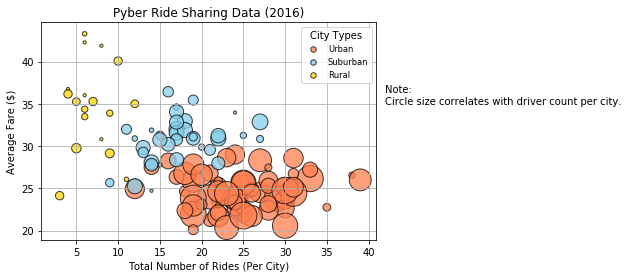

In [30]:
# Obtain the x and y coordinates for each of the three city types
# Group the merged DataFrame by city, and aggregate columns based on the total number of rides
# taken in that city, the average fare price, the type of city, and the number of drivers 
# in that city
Pyber_group = Pyber_df.groupby('city').agg({'ride_id':'count', 'fare':'mean', 
                                            'type':'unique', 'driver_count':'mean'})
Pyber_group = Pyber_group.rename(columns = {'ride_id':'Total Rides', 
                                            'fare':'Average Fare', 'type':'City Type',
                                            'driver_count':'Driver Count'})

# Build the scatter plots for each city types
# Separate the grouped DataFrame into three different DataFrames based on city type
Urban_df = Pyber_group[Pyber_group['City Type'] == 'Urban']
Suburban_df = Pyber_group[Pyber_group['City Type'] == 'Suburban']
Rural_df = Pyber_group[Pyber_group['City Type'] == 'Rural']

# Plot each city type on one scatter plot - each type varying by color. As noted, the size
# of each circle correlates with the number of drivers in that particular city
plt.scatter(Urban_df['Total Rides'], Urban_df['Average Fare'], 
            s = Urban_df['Driver Count']*10, color = 'coral', alpha = 0.75, 
            edgecolor = 'black', label = 'Urban')
plt.scatter(Suburban_df['Total Rides'], Suburban_df['Average Fare'],
            s = Suburban_df['Driver Count']*10, color = 'skyblue', alpha = 0.75, 
            edgecolor = 'black', label = 'Suburban')
plt.scatter(Rural_df['Total Rides'], Rural_df['Average Fare'], 
            s = Rural_df['Driver Count']*10, color = 'gold', alpha = 0.75, 
            edgecolor = 'black', label = 'Rural')

# Incorporate the other graph properties - labels and grid lines
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend - and make legend icons for each of the city types the same size
legend = plt.legend(loc = 'upper right', title = 'City Types', fontsize = 'small')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(x = 42, y = 36.4, s = 'Note:', fontsize=10)
plt.text(x = 42, y = 35, s = 'Circle size correlates with driver count per city.', fontsize=10)

#Save figure and show plot
plt.savefig("./Images/BubblePlot.png")
plt.show()

## Total Fares by City Type

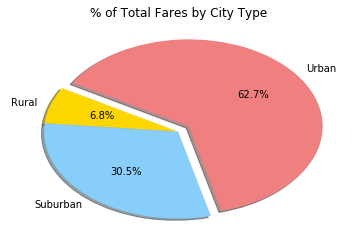

In [29]:
# Calculate Type Percents - and store values in DataFrame 'Fare_group'
Fare_group = Pyber_df.groupby(['type']).sum()[['fare']]
Fare_group = Fare_group.rename(columns = {'fare':'Total Fare'})
Fare_Total = Fare_group['Total Fare'].sum()
Fare_group['Fare Percent'] = round(Fare_group['Total Fare']/Fare_Total*100,2)

# Build Pie Chart
plt.pie(Fare_group['Fare Percent'], labels=['Rural', 'Suburban', 'Urban'], 
        explode=[0, 0, 0.1],colors=['gold', 'lightskyblue', 'lightcoral'],  
        shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('% of Total Fares by City Type')

#Save figure and show plot
plt.savefig("./Images/FarePercentPie.png")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


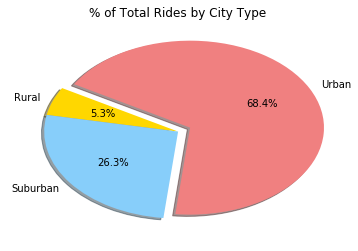

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


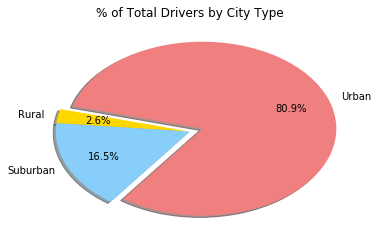

In [6]:
# Show Figure
plt.show()